# Introduction to Linear Regression



Today we will start with one of the most important topics during your data science journey: Linear regression!

Few machine learning algorithms are as popular and rightly so. Linear regression is a powerful algorithm which also lays the foundation for more complex methods. 

In this notebook we will start with a short recap of the theory behind linear regression, continue with an example and train a simple linear regression model using the `scikit-learn` library. There are different libraries that come with an implementation of linear regression. We will start with `scikit-learn` (or `sklearn`) because it is probably the most popular library for data science. 

At the end of the notebook you should know...
1. how linear regression works.
2. the difference between simple vs. multiple linear regression.
3. what slope and intercept mean. 
4. what assumptions are made.
5. how to train a simple linear regression model with sklearn.

---
## Recap



### What is linear regression?



In statistics, **linear regression** is an approach for modeling the relationship between a response variable $y$ and one or more explanatory variables. It is important to remember that linear regression can approximate a relationship, and it cannot prove causality. 
Furthermore it makes some **assumptions**: 
1. **Linearity**: The target variable and the coefficients of the explanatory variables are linearly related.
2. **Zero-Mean Error**: The mean of all residuals is zero.
3. **Strict Exogeneity**: All the explanatory variables are uncorrelated with the residual.
4. **Homoscedasticity**: The variance of the residuals across a single observation remains the same.
5. **No Multicollinearity**: All the explanatory variables are linearly independent.

We can divide linear regression into two categories:
* **Simple linear regression**: cases in which we only have one explanatory variable
* **Multiple linear regression**: cases in which we have more than one explanatory variable

The formula for a simple linear regression is given by 

$$y_i = b_0 + b_1 x_i + e_i$$  
$$\text{for i = } 1, \dots, n$$

where $y_i$ is the true value for our response variable. The formula for the regression equation is given by 

$$\hat{y}_i = b_0 + b_1 x_i$$ 
$$\text{for i = } 1, \dots, n$$

where $\hat{y}_i$ is the predicted value for our response variable and $b_0$ and $b_1$ are the estimated intercept and slope of the line.

### How does it work?



Linear regression is basically just the fancy term for finding the line of best fit. In other words, we are looking for the **intercept** and **slope** that defines a line that fits the data as well as possible. "As well as possible..." often means that we are trying to minimize the sum of squared **residuals** which is also called the **Ordinary Least Squares (OLS)** method.

* **Intercept**: The value for our response variable $y$ when our explanatory variable $x=0$. ($b_0$ in the formula above)
* **Slope**: For each unit increase in $x$, the expected increase or decrease in $y$. This definition is sufficient only in the case of a simple linear regression. In the case of multiple linear regression, we have to add "holding all other explanatory variables constant" to our definition, because there is more than one explanatory variable in the model. ($b_1$ in the formula above)
* **Residual**: The difference between an observed value and the fitted value provided by a model: $e_i = y_i - \hat{y}_i$
* **Ordinary Least Squares (OLS)**: OLS is one of the simplest and most common methods used to find the parameters in a linear regression model. It tries to minimize the sum of squared residuals: $\sum_{i=1}^n e_i^2$. You can find a nice visual explanation [here](https://setosa.io/ev/ordinary-least-squares-regression/). 


---
## Let's start with an example



We will use the data set `cars.csv` which can be found in the `data` folder. Let's suppose we want to explore the relationship between the fuel efficiency of a car (column `mpg` in our dataset) and its weight.

In [1]:
# Import required packages 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set figure stile and size for entire notebook
sns.set_style("ticks")
plt.rcParams["figure.figsize"] = (7,4)

In [2]:
# Import data with pandas 
cars = pd.read_csv("data/cars.csv")
cars.head(n=2)

,car_model,mpg,cyl,disp,hp,drat,weight,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.9,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.9,2.875,17.02,0,1,4,4


Our aim is to model the relationship between `mpg` and `weight` with a straight line.
To get an idea of the relationship between our variables we create a scatter plot first.

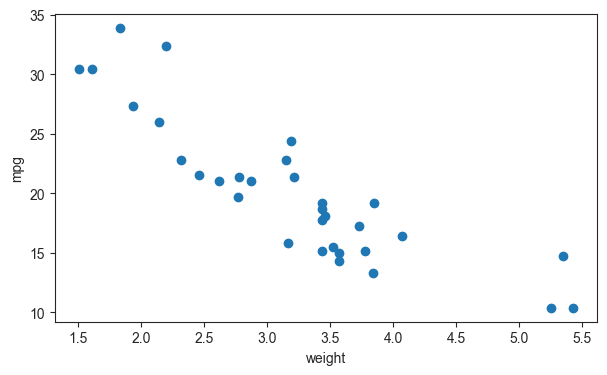

In [3]:
# Plot the variables of interest as scatter plot
plt.scatter(cars['weight'], cars['mpg'])
plt.xlabel("weight")
plt.ylabel("mpg");

>**Just from looking at the figure, what is your guess for the intercept and the slope?**
>* Intercept: 
> * Slope: 

--- 
## Simple linear regression with scikit-learn



In this section we will train our first linear regression model using the library scikit-learn. So far, we have always talked about response and explanatory variables. In data science, it is far more common to refer to our response variable, the one we want to predict, as our **target variable**. The explanatory variables are usually simply called **features**. Furthermore, the slope(s) is often called regression **coefficient(s)**.   

Scikit-learn makes it easy for us to use their algorithms as long as we make sure to organize our data in the correct way to feed it into their models. 
Therefore, in the first step we will define the target variable (`mpg`) and the feature (`weight`). After instantiating a `LinearRegression` object we can train it by calling the `.fit` method with our data.

Note that `"miles per gallon"` is the inverse fraction of the in germany widely used `"litres per kilometer"`.

In [4]:
# Import linear regression from sklearn library
from sklearn.linear_model import LinearRegression

In [5]:
# Prepare data for modeling by defining target and feature
X = cars[['weight']]  # X needs to be 2-dimensional so we need double brackets here
y = cars['mpg']

In [6]:
# Show dimensions of X
X.shape

(32, 1)

In [7]:
# Instantiate our model 
lin_reg = LinearRegression()

# Train the model using our data
lin_reg.fit(X, y)

LinearRegression()

In [8]:
# Intercept and slope/coefficient can be accessed via .intercept_ and .coef_
intercept = lin_reg.intercept_
slope = lin_reg.coef_[0]
print("Model intercept:", intercept)
print("Coefficient for feature weight:", slope)

Model intercept: 37.28512616734204
Coefficient for feature weight: -5.344471572722679


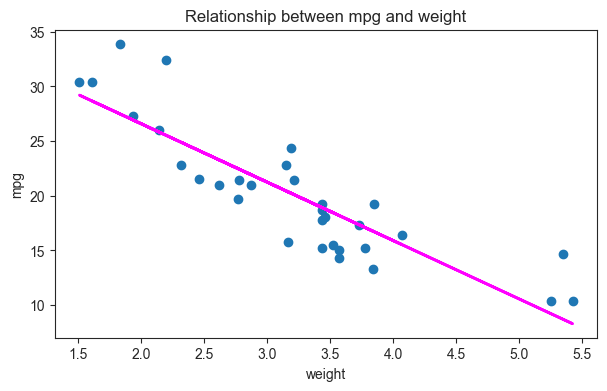

In [9]:
# Plotting our data points
plt.scatter(X, y)

# Adding the fitted regression line of our model
plt.plot(X, X*slope +intercept, '-', color='magenta', linewidth=2)

plt.title("Relationship between mpg and weight")
plt.ylabel("mpg");
plt.xlabel("weight");


In the cells above we trained the linear regression model on our data. With the values for the intercept and coefficient, the regression line could be added to the scatter plot of our data. 

We can also interpret the intercept of our model: According to the model, `mpg` of a car with a `weight` of 0, should be ~ 37.28. As our case shows, intercepts may or may not have any meaning in the "real world". There cannot be a car with a weight of 0...

The value of the coefficient tells us, that we would expect `mpg` to decrease by ~ -5.34 as the `weight` goes up by 1. 

### Quantifying the fit of the model




So far we have seen how to estimate the coefficients of a simple linear regression model. What we are still missing is a proper way of evaluating if our model did a good job or is completely rubbish. As long as we deal with only one feature, we can try to plot the regression line into our data to get a feeling for the fit. But as soon as we increase the amount of features we have to many dimensions to plot, and anyway, plotting and eyeballing is a pretty inaccurate way to measure things. 

#### $R^2$ (r-squared)


Luckily there is a way to asses the fit of our model numerically. We can calculate the $R^2$ of the model. It has a simple interpretation: the $R^2$ is the *proportion* of the variance in the target variable (in our case mpg) that can be accounted for by our features (in our case we have only one feature: weight).

Mathematically speaking we can define $R^2$ as 

$$R^2 = 1 - \frac{SSR}{SST}$$

where **SSR** is the sum of squared residuals ($\sum_{i=1}^n e_i^2$) and **SST** is the total sum of squares ($\sum_{i=1}^n (y_i - \bar{y})^2$).

The value for $R^2$ can be between 0 and 1. If the model perfectly captures the data the **SSR** will be 0 and $R^2$ will return 1. On the other hand a poor fit of the data will result in a high **SSR** and the $R^2$ will be low or even tend towards 0.

#### $R^2$ in scikit-learn


We don't have to calculate the $R^2$ by hand. It is already implemented in sklearn and we can import it from the `sklearn.metrics` module. If you check the [sklearn documentation](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html) for the `r2_score` function you can see that you have to pass at least two arguments: *y_true* and *y_pred*. 
* *y_true* are the "true" values of our target variable (in our case stored in the variable called `y`). 
* *y_pred* are the estimated target values. We've called them $\hat{y}$ at the beginning of the notebook. We could calculated them via the slope and intercept, but sklearn provides us with a more convenient method called `.predict`.  

In [10]:
# Import r-squared from sklearn
from sklearn.metrics import r2_score

In [11]:
# Calculate the estimated value for each data point
y_hat = lin_reg.predict(X)

# Calculate the R-squared for our model
print("R-squared:", r2_score(y, y_hat).round(3))

R-squared: 0.753


A $R^2$ of 0.753 sounds nice in the first place, but you should not rely only on that measure when it comes to assessing the correctness of your model. A $R^2$ of 0.753 means "only" that our feature `weight` explains 75.3 % of the variance in our target variable `mpg`. 

We will come back and dig deeper into the topic of how to properly evaluate the model's performance in a later session.

### Predicting for new instances



One of the reasons why we train models in data science is of course to make predictions for new observations. 
In the section above we have already used the `.predict` method to calculate the estimated y values for the data we used to train our model. That enabled us to calculate the $R^2$ of the model.

We can also use the `.predict` method to estimate (or predict) a value for our target variable for a new observation. In our case, this would mean that we can calculate the estimated `mpg` value for a car with a so far unknown weight. In order to avoid any errors or warnings, we have to make sure that the format of our new data point and the data we used for training the model is the same. Therefore, we define a very tiny data frame with one column called `weight` and one entry. 

In [12]:
# Predict the mpg value for a new car with a weight of 4.5 
new_car = pd.DataFrame({'weight': [4.5]})
y_hat_new = lin_reg.predict(new_car)

In [13]:
print("Predicted value for new observation:", y_hat_new[0].round(3))

Predicted value for new observation: 13.235


According to our model a car with a weight of 4.5 would have fuel consumption of 13.235 mpg. 

## Summary



- Linear regression is finding the best fit line to data.
- Simple linear regression involves a target variable and only **one** feature. Multiple linear regression involves more than one feature.
- Linear regression can approximate a relationship, and it cannot prove causality.
- Linear regression makes some **assumptions**: Linearity, Zero-Mean Error, Strict Exogeneity, Homoscedasticity, and No Multicollinearity. 
- Ordinary Least Squares (OLS) is one fitting algorithm, which mathematically finds the best solution.
- $\textbf{R}^2$ is the proportion of the variation explained by the model.